#  Прогнозирование сахарного диабета

## Содержание
1. [Общая информация о переменных](#section-1)

2. [Импорт библиотек](#section-2)

3. [EDA (Исследовательский анализ данных)](#section-3)

4. [Визуализация данных](#section-4)

5. [Подготовка данных к обучению](#section-5)

6. [Операции кодирования](#section-6)

7. [Моделирование](#section-7)

8. [Предсказание](#section-8)

## Переменные
<a id="section-1"></a>

**Pregnancies:** количество беременностей

**Glucose:** уровень глюкозы в крови

**BloodPressure:** измерение артериального давления

**SkinThickness:** толщина кожи

**Insulin:** уровень инсулина в крови

**BMI:** индекс массы тела

**DiabetesPedigreeFunction:** процент диабета

**Age:** возраст

**Outcome:** конечного результата: 1 — это Да, а 0 — Нет

## Импорт библиотек
<a id="section-2"></a>


In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import tkinter as tk
from tkinter import *
from tkinter import PhotoImage
import warnings

In [2]:
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

set_seed(1000)

##  EDA (Исследовательский анализ данных)
<a id="section-3"></a>


In [4]:
df_=pd.read_csv("diabetes.csv")
df=df_.copy()
df_for_pred = df_.copy()

In [5]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### NA #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Quantiles #####################
                           count    mean     std    min     0%     5%     50%     95%     99%    100%     max
Pregnancies              768.000   3.845   3.370  0.000  0.

In [7]:
for col in df.columns:
    print(col,":",df[col].nunique())
    print("######################")

Pregnancies : 17
######################
Glucose : 136
######################
BloodPressure : 47
######################
SkinThickness : 51
######################
Insulin : 186
######################
BMI : 248
######################
DiabetesPedigreeFunction : 517
######################
Age : 52
######################
Outcome : 2
######################


### Проведем анализ целевой переменной, найдём среднее значение числовых переменных по целевой переменной.


In [8]:
num_cols = [col for col in df.columns if col != "Outcome"]

In [9]:
def target_num(dataframe, target, num_cols):
    print("\n\n",dataframe.groupby(target)[num_cols].mean())

In [10]:
target_num(df,"Outcome",num_cols)



          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age
Outcome                                                                                                     
0              3.298  109.980         68.184         19.664   68.792 30.304                     0.430 31.190
1              4.866  141.257         70.825         22.164  100.336 35.143                     0.550 37.067


## Визуализация данных
<a id="section-4"></a>


### Построим график распередления целевой переменной

<Axes: xlabel='Outcome'>

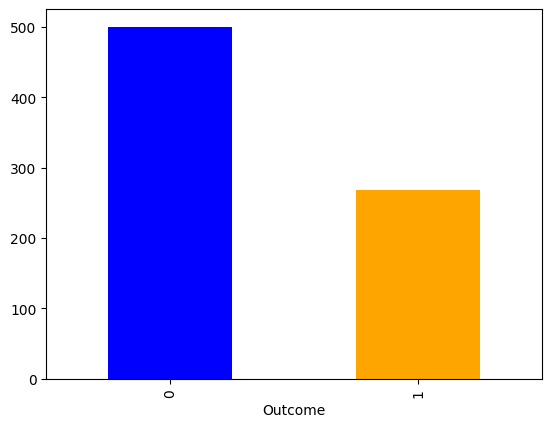

In [11]:
df["Outcome"].value_counts().plot.bar(color=['blue', 'orange'])

### Проведем анализ наблюдений за выбросами


Объединив два графика, прямоугольный график и линейчатый график, мы получим визуализацию, которая показывает распределение точек на прямоугольном графике. Прямоугольный график показывает общие тенденции и распределение, в то время как линейчатая диаграмма показывает отдельные
точки данных. Такая комбинация удобна для понимания тенденций и отклонений в наборе данных.

In [12]:
num_cols_rus_y = ["Количество беременностей", "Уровень глюкозы", "Артериального давление", "Толщина кожи", "Инсулин", "Индекс массы тела", "Процент диабета", "Возраст"]

In [13]:
num_cols_rus_x = ["количества беременностей", "уровня глюкозы", "артериального давления", "толщины кожи", "инсулина", "индекса массы тела", "процента диабета", "возраста"]

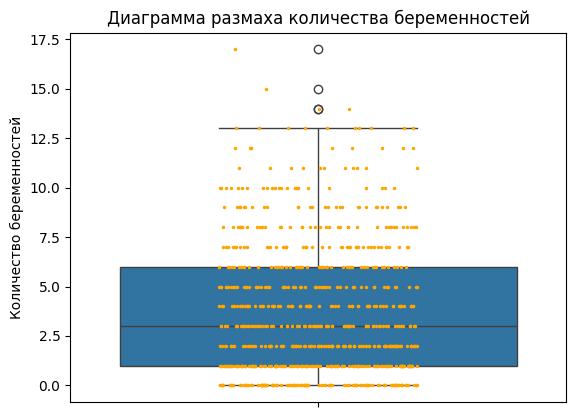

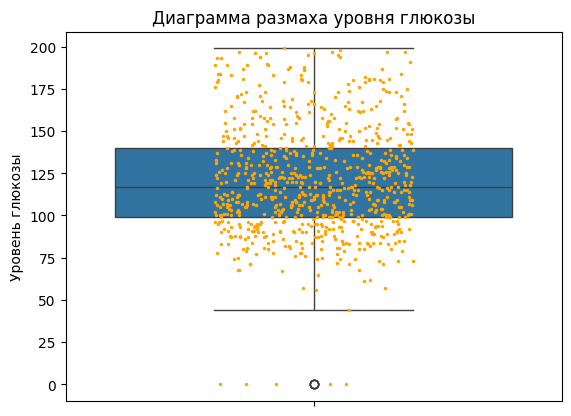

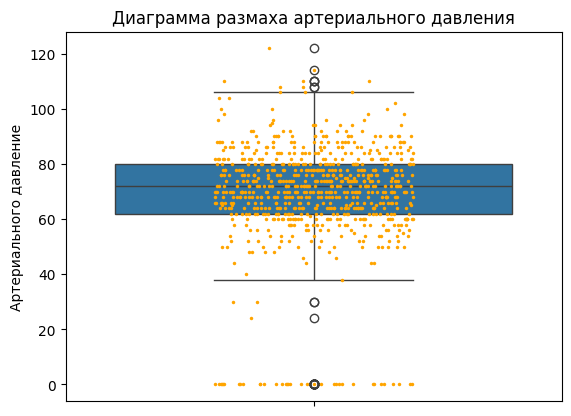

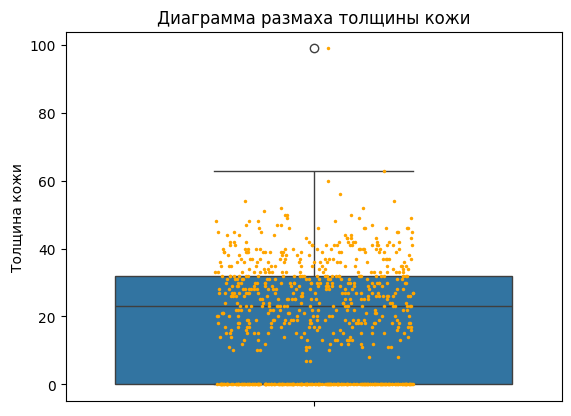

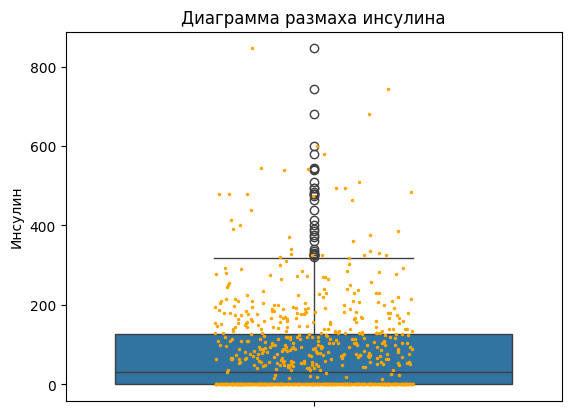

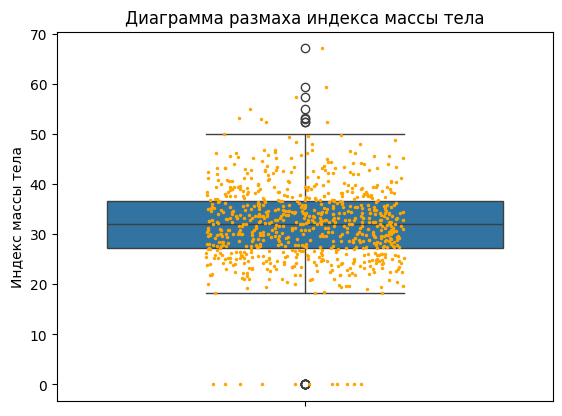

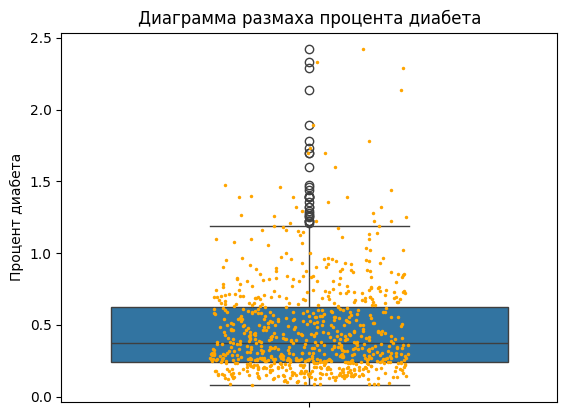

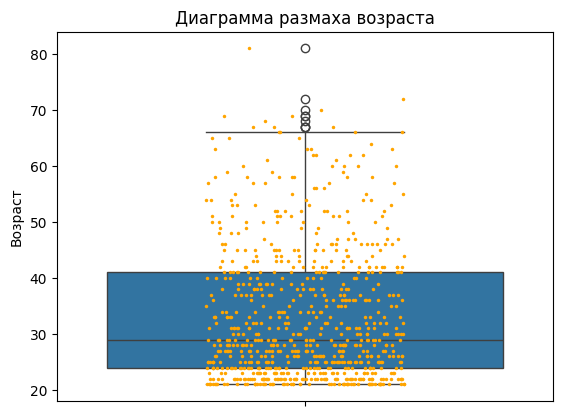

In [14]:
for col in range(len(num_cols)):
    ax =sns.boxplot(data=df[num_cols[col]])
    ax =sns.stripplot( data=df[num_cols[col]], color="orange", jitter=0.2, size=2.5)
    plt.title(f'Диаграмма размаха {num_cols_rus_x[col]}')
    plt.ylabel(f'{num_cols_rus_y[col]}')
    plt.show()

### Проведем корреляционный анализ.

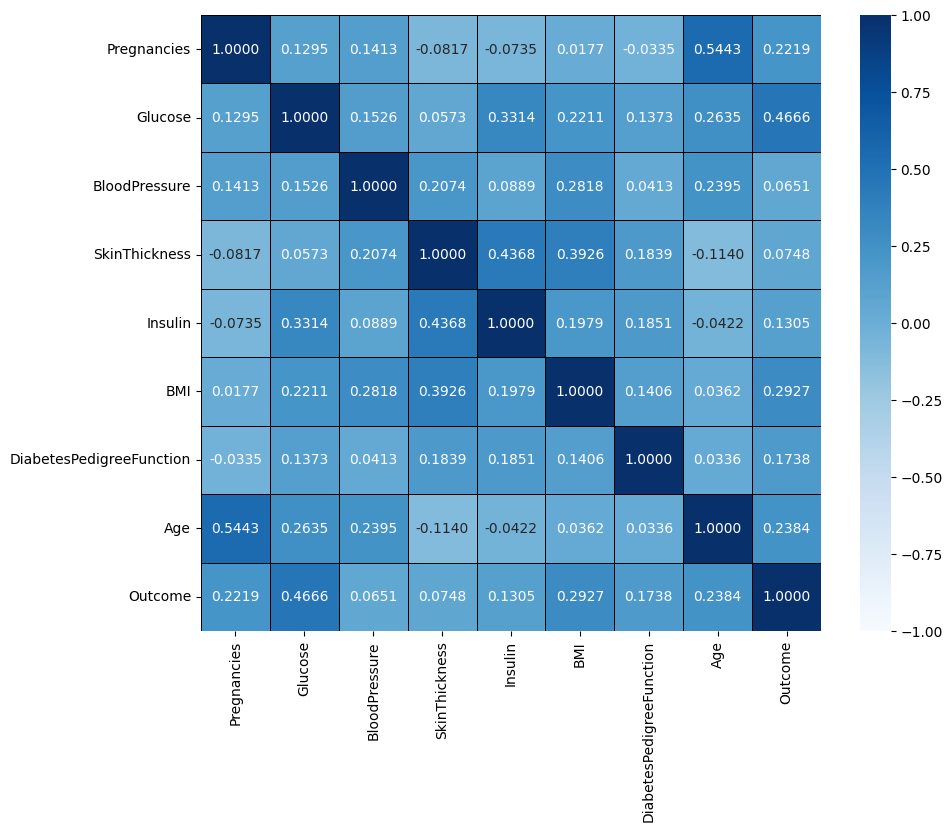

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax=ax, cmap="Blues")
plt.show()

## Подготовка данных к обучению
<a id="section-5"></a>

В наборе данных нет пропущенных наблюдений, но глюкоза, инсулин и т.д. содержат значения 0. Единицы наблюдения, содержащие значения 0 в переменных, могут представлять собой пропущенные значения. Например, значения глюкозы или инсулина у человека не будут равны 0. Принимая во внимание эту ситуацию, можем заменить значения переменных равные нулю на значение NaN, что означает пропущенное значение.

In [16]:
missing= ["Glucose","BloodPressure","SkinThickness","Insulin","BMI" ]

In [17]:
df[missing] = df[missing].replace(0, np.nan)

In [18]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
for col in missing:
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = df[df["Outcome"]==0][col].median()
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = df[df["Outcome"]==1][col].median()

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1
5,5,116.000,74.000,27.000,102.500,25.600,0.201,30,0
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1
7,10,115.000,70.000,27.000,102.500,35.300,0.134,29,0
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53,1
9,8,125.000,96.000,32.000,169.500,34.300,0.232,54,1


#### Сделаем копию таблицы для дальнейшего прогнозирования

In [22]:
df_withoutNull = df.copy()

### Давайте создадим новые переменные.

In [23]:
df['Age_new'] = pd.cut(x=df['Age'], bins=[20,29,45,max(df["Age"])],labels = ["young","mature","senior"])

df["BMI_new"] = pd.cut(x=df['BMI'], bins=[min(df["BMI"])-1,18.5,25,30,max(df["BMI"])],labels = ["underweight","weight","overweight","obese"])

df["Glucose_new"] = pd.cut(x=df['Glucose'], bins=[min(df["Glucose"])-1,140,max(df["Glucose"])],labels = ["normal","abnormal"])

df["BloodPressure_new"] = pd.cut(x=df['BloodPressure'], bins=[min(df["BloodPressure"])-1,80,90,max(df["BloodPressure"])],labels = ["normal","Hypertension_Stage_1","Hypertension_Stage_2"])


In [24]:
df["Glucose_Insulin "]=df["Glucose"]*df["Insulin"]
df["Insulin_BMI"]=df["Insulin"]*df["BMI"]
df["Glucose_BloodPressure"]= df["Glucose"]* df["BloodPressure"]
df["Insulin_BloodPressure"]= df["Insulin"]*df["BloodPressure"]

In [25]:
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="matureUnderWeight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="weight"),"AGE_BMI"]="matureWeight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="matureOverweight"
df.loc[(df["Age_new"]=="mature") & (df["BMI_new"]=="obese"),"AGE_BMI"]="matureObese"

df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="youngUnderWeight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="weight"),"AGE_BMI"]="youngWeight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="youngOverweight"
df.loc[(df["Age_new"]=="young") & (df["BMI_new"]=="obese"),"AGE_BMI"]="youngObese"

df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="underweight"),"AGE_BMI"]="seniorUnderweight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="weight"),"AGE_BMI"]="seniorWeight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="overweight"),"AGE_BMI"]="seniorOverweight"
df.loc[(df["Age_new"]=="senior") & (df["BMI_new"]=="obese"),"AGE_BMI"]="seniorObese"

In [26]:
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="matureNormal"
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="matureHypertension_Stage_1"
df.loc[(df["Age_new"]=="mature") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="matureHypertension_Stage_2"


df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="youngNormal"
df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="youngHypertension_Stage_1"
df.loc[(df["Age_new"]=="young") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="youngHypertension_Stage_2"

df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="seniorNormal"
df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="seniorHypertension_Stage_1"
df.loc[(df["Age_new"]=="senior") & (df["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="seniorHypertension_Stage_2"

In [27]:
df.loc[(df["Age_new"]=="mature") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="matureNormal"
df.loc[(df["Age_new"]=="mature") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="matureAbnormal"

df.loc[(df["Age_new"]=="young") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="youngNormal"
df.loc[(df["Age_new"]=="young") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="youngabnormal"

df.loc[(df["Age_new"]=="senior") & (df["Glucose_new"]=="normal"),"Age_Glucose"]="seniorNormal"
df.loc[(df["Age_new"]=="senior") & (df["Glucose_new"]=="abnormal"),"Age_Glucose"]="seniorAbnormal"


In [28]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_new,BMI_new,Glucose_new,BloodPressure_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI,AGE_BloodPressure,Age_Glucose
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,senior,obese,abnormal,normal,25086.000,5695.200,10656.000,12204.000,seniorObese,seniorNormal,seniorAbnormal
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,mature,overweight,normal,normal,8712.500,2726.500,5610.000,6765.000,matureOverweight,matureNormal,matureNormal
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,mature,weight,abnormal,normal,31018.500,3949.350,11712.000,10848.000,matureWeight,matureNormal,matureAbnormal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,overweight,normal,normal,8366.000,2641.400,5874.000,6204.000,youngOverweight,youngNormal,youngNormal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,obese,normal,normal,23016.000,7240.800,5480.000,6720.000,matureObese,matureNormal,matureNormal
5,5,116.000,74.000,27.000,102.500,25.600,0.201,30,0,mature,overweight,normal,normal,11890.000,2624.000,8584.000,7585.000,matureOverweight,matureNormal,matureNormal
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,young,obese,normal,normal,6864.000,2728.000,3900.000,4400.000,youngObese,youngNormal,youngNormal
7,10,115.000,70.000,27.000,102.500,35.300,0.134,29,0,young,obese,normal,normal,11787.500,3618.250,8050.000,7175.000,youngObese,youngNormal,youngNormal
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53,1,senior,obese,abnormal,normal,106971.000,16561.500,13790.000,38010.000,seniorObese,seniorNormal,seniorAbnormal
9,8,125.000,96.000,32.000,169.500,34.300,0.232,54,1,senior,obese,normal,Hypertension_Stage_2,21187.500,5813.850,12000.000,16272.000,seniorObese,seniorHypertension_Stage_2,seniorNormal


### Создадим функцию, которая определит числовые и категориальные переменные

In [29]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

In [30]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols=[col for col in cat_cols if col != "OUTCOME"]

## Операции кодирования
<a id="section-6"></a>

### Преобразуем категориальные признаки в численные значения

In [31]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df,col)

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_new,BMI_new,Glucose_new,BloodPressure_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI,AGE_BloodPressure,Age_Glucose
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,senior,obese,0,normal,25086.000,5695.200,10656.000,12204.000,seniorObese,seniorNormal,seniorAbnormal
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,mature,overweight,1,normal,8712.500,2726.500,5610.000,6765.000,matureOverweight,matureNormal,matureNormal
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,mature,weight,0,normal,31018.500,3949.350,11712.000,10848.000,matureWeight,matureNormal,matureAbnormal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,overweight,1,normal,8366.000,2641.400,5874.000,6204.000,youngOverweight,youngNormal,youngNormal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,mature,obese,1,normal,23016.000,7240.800,5480.000,6720.000,matureObese,matureNormal,matureNormal


### Изменим категориальные переменные на значения True или False

In [33]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cat_cols = [col for col in cat_cols if col not in binary_cols]

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI_matureOverweight,AGE_BMI_matureWeight,AGE_BMI_seniorObese,AGE_BMI_seniorOverweight,AGE_BMI_seniorWeight,AGE_BMI_youngObese,AGE_BMI_youngOverweight,AGE_BMI_youngUnderWeight,AGE_BMI_youngWeight,AGE_BloodPressure_matureHypertension_Stage_2,AGE_BloodPressure_matureNormal,AGE_BloodPressure_seniorHypertension_Stage_1,AGE_BloodPressure_seniorHypertension_Stage_2,AGE_BloodPressure_seniorNormal,AGE_BloodPressure_youngHypertension_Stage_1,AGE_BloodPressure_youngHypertension_Stage_2,AGE_BloodPressure_youngNormal,Age_Glucose_matureNormal,Age_Glucose_seniorAbnormal,Age_Glucose_seniorNormal,Age_Glucose_youngNormal,Age_Glucose_youngabnormal,Age_new_mature,Age_new_senior,BMI_new_weight,BMI_new_overweight,BMI_new_obese,BloodPressure_new_Hypertension_Stage_1,BloodPressure_new_Hypertension_Stage_2
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,0,25086.000,5695.200,10656.000,12204.000,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,1,8712.500,2726.500,5610.000,6765.000,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,0,31018.500,3949.350,11712.000,10848.000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,1,8366.000,2641.400,5874.000,6204.000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,1,23016.000,7240.800,5480.000,6720.000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


### Проведем нормализацию для числовых переменных.

In [35]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df[num_cols].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure
0,0.600,0.765,0.000,1.000,1.000,0.170,0.665,1.235,0.850,0.647,0.531,0.626
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.056,0.118,-0.410,-0.330,-0.653,-0.270
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.783,0.176,1.307,0.072,0.779,0.403
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.537,-0.471,-0.437,-0.358,-0.591,-0.363
4,-0.600,0.494,-2.000,1.000,0.978,1.214,5.008,0.235,0.691,1.155,-0.683,-0.278


In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_new,Glucose_Insulin,Insulin_BMI,Glucose_BloodPressure,Insulin_BloodPressure,AGE_BMI_matureOverweight,AGE_BMI_matureWeight,AGE_BMI_seniorObese,AGE_BMI_seniorOverweight,AGE_BMI_seniorWeight,AGE_BMI_youngObese,AGE_BMI_youngOverweight,AGE_BMI_youngUnderWeight,AGE_BMI_youngWeight,AGE_BloodPressure_matureHypertension_Stage_2,AGE_BloodPressure_matureNormal,AGE_BloodPressure_seniorHypertension_Stage_1,AGE_BloodPressure_seniorHypertension_Stage_2,AGE_BloodPressure_seniorNormal,AGE_BloodPressure_youngHypertension_Stage_1,AGE_BloodPressure_youngHypertension_Stage_2,AGE_BloodPressure_youngNormal,Age_Glucose_matureNormal,Age_Glucose_seniorAbnormal,Age_Glucose_seniorNormal,Age_Glucose_youngNormal,Age_Glucose_youngabnormal,Age_new_mature,Age_new_senior,BMI_new_weight,BMI_new_overweight,BMI_new_obese,BloodPressure_new_Hypertension_Stage_1,BloodPressure_new_Hypertension_Stage_2
0,0.600,0.765,0.000,1.000,1.000,0.170,0.665,1.235,1,0,0.850,0.647,0.531,0.626,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.056,0.118,0,1,-0.410,-0.330,-0.653,-0.270,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.783,0.176,1,0,1.307,0.072,0.779,0.403,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.537,-0.471,0,1,-0.437,-0.358,-0.591,-0.363,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,-0.600,0.494,-2.000,1.000,0.978,1.214,5.008,0.235,1,1,0.691,1.155,-0.683,-0.278,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


## Моделирование
<a id="section-7"></a>

In [37]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Классификатор случайных лесов

In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_1 = rf_model.predict(X_test)
rf_f1_score= f1_score(y_pred_1, y_test)
print(rf_f1_score)

0.8170731707317073


### Light Gradient Boosting Machine Classifier

In [39]:
lgbm_model= LGBMClassifier(verbosity=-1)
lgbm_model.fit(X_train, y_train)
y_pred_2 =lgbm_model.predict(X_test)
lgbm_f1_score= f1_score(y_pred_2, y_test)
print(lgbm_f1_score)

0.8220858895705522


### Классификатор дерева решений

In [40]:
des_model = DecisionTreeClassifier()
des_model.fit(X_train, y_train)
y_pred_2 = des_model.predict(X_test)
decison_f1_score = f1_score(y_pred_2, y_test)
print(decison_f1_score)

0.7484662576687117


### Логистическая регрессия

In [41]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_3 = log_model.predict(X_test)
logistic_f1_score = f1_score(y_pred_3, y_test)
print(logistic_f1_score)

0.6710526315789473


### Extreme Gradient Boosting Classifier

In [42]:
xgm_model= XGBClassifier()
xgm_model.fit(X_train, y_train)
y_pred_4 =xgm_model.predict(X_test)
xgb_f1_score = f1_score(y_pred_4, y_test)
print(xgb_f1_score)

0.8143712574850299


### K-Ближайшие соседи

In [43]:
knn_model= KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_6 =knn_model.predict(X_test)
knn_f1_score = f1_score(y_pred_6, y_test)
print(knn_f1_score)

0.7435897435897436


### Определим, какая из моделей самая точная

In [44]:
models= [rf_model, lgbm_model, des_model, log_model, xgm_model, knn_model]

best_model = None
best_accuracy = 0

for i, model in enumerate(models,1):
    model.fit(X_train, y_train)
    y_pred_i= model.predict(X_test)
    f1_score_model=f1_score(y_pred_i, y_test)

    print(f'Model Name: {type(model).__name__}, Accuracy: {f1_score_model}\n')

    print("#"*80)

    if f1_score_model> best_accuracy:
        best_accuracy=f1_score_model
        best_model = model

print(f"Best Model {best_model}, Best Accuracy {best_accuracy}")

Model Name: RandomForestClassifier, Accuracy: 0.8074534161490683

################################################################################
Model Name: LGBMClassifier, Accuracy: 0.8220858895705522

################################################################################
Model Name: DecisionTreeClassifier, Accuracy: 0.7469879518072289

################################################################################
Model Name: LogisticRegression, Accuracy: 0.6710526315789473

################################################################################
Model Name: XGBClassifier, Accuracy: 0.8143712574850299

################################################################################
Model Name: KNeighborsClassifier, Accuracy: 0.7435897435897436

################################################################################
Best Model LGBMClassifier(verbosity=-1), Best Accuracy 0.8220858895705522


### Определим, какие переменные оказывают наибольшее влияние на прогнозы модели

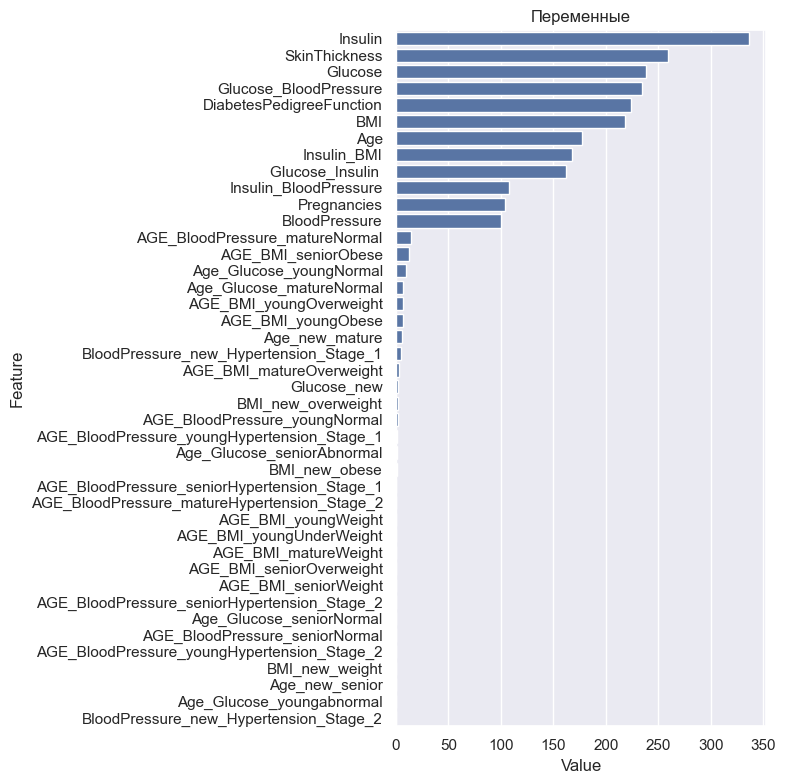

In [45]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Переменные')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(best_model, X_train)

## Предсказание
<a id="section-8"></a>

### Напишем приложение с помощью библиотеки Tkinter 

#### Напишем функцию для обработки полученных данных и предсказания

In [46]:
def processing_and_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
   df_pred = df_withoutNull.copy()
   df_pred = df_pred.drop(columns=['Outcome'])
   df_pred.loc[df_pred.shape[0]] = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

   df_pred['Age_new'] = pd.cut(x=df_pred['Age'], bins=[20,29,45,max(df_for_pred["Age"])],labels = ["young","mature","senior"])
   df_pred["BMI_new"] = pd.cut(x=df_pred['BMI'], bins=[min(df_for_pred["BMI"])-1,18.5,25,30,max(df_for_pred["BMI"])],labels = ["underweight","weight","overweight","obese"])
   df_pred["Glucose_new"] = pd.cut(x=df_pred['Glucose'], bins=[min(df_for_pred["Glucose"])-1,140,max(df_for_pred["Glucose"])],labels = ["normal","abnormal"])
   df_pred["BloodPressure_new"] = pd.cut(x=df_pred['BloodPressure'], bins=[min(df_for_pred["BloodPressure"])-1,80,90,max(df_for_pred["BloodPressure"])],labels = ["normal","Hypertension_Stage_1","Hypertension_Stage_2"])


   df_pred["Glucose_Insulin "]=df_pred["Glucose"]*df_pred["Insulin"]
   df_pred["Insulin_BMI"]=df_pred["Insulin"]*df_pred["BMI"]
   df_pred["Glucose_BloodPressure"]= df_pred["Glucose"]* df_pred["BloodPressure"]
   df_pred["Insulin_BloodPressure"]= df_pred["Insulin"]*df_pred["BloodPressure"]


   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["BMI_new"]=="underweight"),"AGE_BMI"]="matureUnderWeight"
   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["BMI_new"]=="weight"),"AGE_BMI"]="matureWeight"
   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["BMI_new"]=="overweight"),"AGE_BMI"]="matureOverweight"
   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["BMI_new"]=="obese"),"AGE_BMI"]="matureObese"

   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["BMI_new"]=="underweight"),"AGE_BMI"]="youngUnderWeight"
   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["BMI_new"]=="weight"),"AGE_BMI"]="youngWeight"
   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["BMI_new"]=="overweight"),"AGE_BMI"]="youngOverweight"
   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["BMI_new"]=="obese"),"AGE_BMI"]="youngObese"

   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["BMI_new"]=="underweight"),"AGE_BMI"]="seniorUnderweight"
   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["BMI_new"]=="weight"),"AGE_BMI"]="seniorWeight"
   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["BMI_new"]=="overweight"),"AGE_BMI"]="seniorOverweight"
   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["BMI_new"]=="obese"),"AGE_BMI"]="seniorObese"


   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="matureNormal"
   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="matureHypertension_Stage_1"
   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="matureHypertension_Stage_2"

   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="youngNormal"
   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="youngHypertension_Stage_1"
   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="youngHypertension_Stage_2"

   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["BloodPressure_new"]=="normal"),"AGE_BloodPressure"]="seniorNormal"
   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["BloodPressure_new"]=="Hypertension_Stage_1"),"AGE_BloodPressure"]="seniorHypertension_Stage_1"
   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["BloodPressure_new"]=="Hypertension_Stage_2"),"AGE_BloodPressure"]="seniorHypertension_Stage_2"


   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["Glucose_new"]=="normal"),"Age_Glucose"]="matureNormal"
   df_pred.loc[(df_pred["Age_new"]=="mature") & (df_pred["Glucose_new"]=="abnormal"),"Age_Glucose"]="matureAbnormal"

   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["Glucose_new"]=="normal"),"Age_Glucose"]="youngNormal"
   df_pred.loc[(df_pred["Age_new"]=="young") & (df_pred["Glucose_new"]=="abnormal"),"Age_Glucose"]="youngabnormal"

   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["Glucose_new"]=="normal"),"Age_Glucose"]="seniorNormal"
   df_pred.loc[(df_pred["Age_new"]=="senior") & (df_pred["Glucose_new"]=="abnormal"),"Age_Glucose"]="seniorAbnormal"


   cat_cols, num_cols, cat_but_car = grab_col_names(df_pred)

   binary_cols = [col for col in cat_cols if df_pred[col].nunique() == 2]

   for col in binary_cols:
      df_pred = label_encoder(df_pred,col)

   cat_cols = [col for col in cat_cols if col not in binary_cols]

   df_pred = one_hot_encoder(df_pred, cat_cols, drop_first=True)

   rs = RobustScaler()
   df_pred[num_cols] = rs.fit_transform(df_pred[num_cols])

   df_x = df_pred.drop(df.index.to_list()[0:df_pred.shape[0] - 1], axis=0)
   predict = best_model.predict(df_x)
   output = int(predict[0])

   return output
   

#### Напшием приложение и обработку полученных данных

In [47]:
window = Tk()

window.title("Сахарный диабет") #название программы
window.geometry('600x600') 
window.resizable(False, False) #фиксация размера


frame = Frame(window, bg = '#363232')
frame.place(relheight=1, relwidth=1)

title_b = Label(frame, text='Кол-во беременностей', bg="#363232", foreground="white", font=("Shentox", 14))
title_b.place(x=45, y=45)

enter_b = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_b.place(x=45, y=75)

title_g = Label(frame, text='Глюкоза', bg="#363232", foreground="white", font=("Shentox", 14))
title_g.place(x=336, y=45)

enter_g = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_g.place(x=336, y=75)


title_a = Label(frame, text='Артериальное давление', bg="#363232", foreground="white", font=("Shentox", 14))
title_a.place(x=45, y=120)

enter_a = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_a.place(x=45, y=150)

title_t = Label(frame, text='Толщина кожи', bg="#363232", foreground="white", font=("Shentox", 14))
title_t.place(x=336, y=120)

enter_t = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_t.place(x=336, y=150)


title_i = Label(frame, text='Инсулин', bg="#363232", foreground="white", font=("Shentox", 14))
title_i.place(x=45, y=195)

enter_i = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_i.place(x=45, y=225)

title_imt = Label(frame, text='ИМТ', bg="#363232", foreground="white", font=("Shentox", 14))
title_imt.place(x=336, y=195)

enter_imt = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_imt.place(x=336, y=225)


title_f = Label(frame, text='Функция родословной', bg="#363232", foreground="white", font=("Shentox", 14))
title_f.place(x=45, y=270)

enter_f = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_f.place(x=45, y=300)

title_age = Label(frame, text='Возраст', bg="#363232", foreground="white", font=("Shentox", 14))
title_age.place(x=336, y=270)

enter_age = Entry(frame, bg="#D9D9D9", width='20', font=("Shentox", 14))
enter_age.place(x=336, y=300)


def valid_Pregnancies(Pregnancies):
   try:
      float(Pregnancies)
      return True
   except:
      return False

def valid_Glucose(Glucose):
   try:
      float(Glucose)
      return True
   except:
      return False

def valid_BloodPressure(BloodPressure):
   try:
      float(BloodPressure)
      return True
   except:
      return False

def valid_SkinThickness(SkinThickness):
   try:
      float(SkinThickness)
      return True
   except:
      return False

def valid_Insulin(Insulin):
   try:
      float(Insulin)
      return True
   except:
      return False

def valid_BMI(BMI):
   try:
      float(BMI)
      return True
   except:
      return False

def valid_DiabetesPedigreeFunction(DiabetesPedigreeFunction):
   try:
      float(DiabetesPedigreeFunction)
      return True
   except:
      return False

def valid_Age(Age):
   try:
      float(Age)
      return True
   except:
      return False



def valid(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
   if valid_Pregnancies(Pregnancies) and valid_Glucose(Glucose) and valid_BloodPressure(BloodPressure) and valid_SkinThickness(SkinThickness) and valid_Insulin(Insulin) and valid_BMI(BMI) \
      and valid_DiabetesPedigreeFunction(DiabetesPedigreeFunction) and valid_Age(Age):
      return True
   return False

def on_submit():
   Pregnancies = enter_b.get()
   Glucose = enter_g.get()
   BloodPressure = enter_a.get()
   SkinThickness = enter_t.get()
   Insulin = enter_i.get()
   BMI = enter_imt.get()
   DiabetesPedigreeFunction = enter_f.get()
   Age = enter_age.get()

   if not valid(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
      title_result.config(text="Не верный ввод", foreground="white")
   else:
      if processing_and_prediction(float(Pregnancies), float(Glucose), float(BloodPressure), float(SkinThickness), float(Insulin), float(BMI), float(DiabetesPedigreeFunction), float(Age)) == 0:
         title_result.config(text="Отрицательный", foreground="#FF5757")
      else:
         title_result.config(text="Положительный", foreground="#F4FF57")
     
      
def back():
   title_result.config(text="Введите данные", foreground="white")


btn = Button(frame, text="Узнать", font=("Shentox", 16), width='20', command=on_submit)
btn.place(x=185 , y=360)

btn_back = Button(frame, text="Сброс", font=("Shentox", 14), width='8', command=back)
btn_back.place(x=450 , y=362)


title = Label(frame, text='Результат', bg="#363232", foreground="white", font=("Shentox", 22))
title.place(x=235 , y=440)
title_result = Label(frame, text='Введите данные', bg="#363232", foreground="white", font=("Shentox", 24))
title_result.place(x=190 , y=480)

window.mainloop()